# Proyek Machine Learning - Klasifikasi Penyakit Jantung

**Nama:** Muhammad Mahathir

**Email:** mhmmdmhthr@gmail.com

**ID Dicoding:** MC322D5Y1764

## 1. Pendahuluan

Proyek ini bertujuan untuk membangun model klasifikasi machine learning guna memprediksi apakah seseorang memiliki penyakit jantung berdasarkan parameter kesehatan tertentu. Dataset yang digunakan adalah *Heart Failure Prediction Dataset* dari Kaggle, yang berisi 918 sampel data pasien dengan 11 fitur medis seperti usia, tekanan darah, kadar kolesterol, dan lainnya, serta kolom target yang menunjukkan keberadaan penyakit jantung (0 = Tidak, 1 = Ya).

Penyakit jantung adalah penyebab kematian utama di dunia, menyumbang sekitar 17,9 juta kematian per tahun menurut World Health Organization (WHO). Deteksi dini melalui model prediktif dapat membantu tenaga medis mendiagnosis pasien lebih cepat, mengurangi risiko komplikasi, dan meningkatkan hasil pengobatan. Proyek ini akan membandingkan beberapa algoritma machine learning untuk menemukan model terbaik yang dapat diandalkan untuk klasifikasi biner.

**Mengapa Masalah Ini Penting:** Deteksi dini penyakit jantung sulit dilakukan tanpa alat diagnostik canggih, terutama di daerah dengan sumber daya terbatas. Model machine learning dapat menjadi solusi hemat biaya untuk skrining awal.

**Tautan Dataset:** [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


## Business Understanding

### Problem Statements

Berdasarkan latar belakang di atas, berikut adalah pernyataan masalah dalam proyek ini:

1. Deteksi dini penyakit jantung sulit dilakukan tanpa alat diagnostik canggih, terutama di fasilitas kesehatan dengan sumber daya terbatas, mengakibatkan keterlambatan diagnosis dan hasil pengobatan yang kurang optimal.
2. Data medis pasien yang kompleks memerlukan analisis prediktif yang akurat untuk mengidentifikasi pasien berisiko tinggi penyakit jantung, namun perlu pendekatan yang tepat untuk mendapatkan hasil prediksi yang dapat diandalkan.
3. Ketidakseimbangan dalam distribusi kelas pada data medis dapat menyebabkan bias dalam model prediksi, mempengaruhi kemampuan sistem untuk mengidentifikasi kasus positif dengan benar.

### Goals

Tujuan dari proyek ini adalah:

1. Mengembangkan model machine learning yang dapat memprediksi keberadaan penyakit jantung pada pasien dengan akurasi, precision, dan recall yang tinggi, sehingga dapat digunakan sebagai alat bantu diagnostik awal.
2. Membandingkan performa beberapa algoritma machine learning (Logistic Regression, Random Forest, dan Gradient Boosting) untuk menemukan pendekatan optimal dalam memprediksi penyakit jantung.
3. Mengoptimalkan model terpilih melalui hyperparameter tuning untuk meningkatkan performa prediksi.

### Solution Statements

Untuk mencapai tujuan tersebut, berikut adalah solusi yang ditawarkan:

1. Mengimplementasikan tiga algoritma machine learning untuk perbandingan:
   - Logistic Regression: Sebagai model dasar yang interpretable dan efektif untuk klasifikasi biner.
   - Random Forest Classifier: Model ensemble yang tahan terhadap overfitting dan dapat menangani hubungan non-linear antar fitur.
   - Gradient Boosting Classifier: Model ensemble kuat yang dapat menangkap hubungan kompleks dalam data.

2. Menerapkan teknik SMOTE (Synthetic Minority Oversampling Technique) untuk mengatasi ketidakseimbangan kelas dalam dataset, sehingga meningkatkan performa model dalam mengidentifikasi kasus positif.

3. Melakukan hyperparameter tuning pada algoritma terbaik menggunakan RandomizedSearchCV untuk meningkatkan performa model, dengan fokus pada F1-score sebagai metrik utama untuk menyeimbangkan precision dan recall.

4. Mengevaluasi model akhir menggunakan metrik yang komprehensif: accuracy, precision, recall, F1-score, dan ROC-AUC, untuk memastikan model memiliki performa yang baik dalam berbagai aspek.

## 3. Import Library yang Dibutuhkan

Mengimpor semua library yang diperlukan untuk analisis data, visualisasi, *preprocessing*, pemodelan, dan evaluasi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 4. Data Understanding

Dataset *Heart Failure Prediction* berisi 918 sampel dengan 11 fitur dan 1 kolom target (*HeartDisease*). Dataset ini mencakup informasi medis pasien untuk memprediksi penyakit jantung.

**Sumber Dataset:** [Kaggle - Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Variabel/Fitur pada Dataset
- **Age**: Usia pasien (tahun).
- **Sex**: Jenis kelamin pasien (M = Pria, F = Wanita).
- **ChestPainType**: Tipe nyeri dada (TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic).
- **RestingBP**: Tekanan darah istirahat (mm Hg).
- **Cholesterol**: Kadar kolesterol serum (mg/dL).
- **FastingBS**: Gula darah puasa (1 = >120 mg/dL, 0 = ≤120 mg/dL).
- **RestingECG**: Hasil elektrokardiogram istirahat (Normal, ST = ST-T wave abnormality, LVH = Left ventricular hypertrophy).
- **MaxHR**: Denyut jantung maksimum yang dicapai (bpm).
- **ExerciseAngina**: Angina akibat olahraga (Y = Ya, N = Tidak).
- **Oldpeak**: Depresi ST yang diinduksi olahraga relatif terhadap istirahat (numerik).
- **ST_Slope**: Kemiringan segmen ST saat puncak olahraga (Up, Flat, Down).
- **HeartDisease**: Target, apakah pasien memiliki penyakit jantung (0 = Tidak, 1 = Ya).

### Pemeriksaan Awal Dataset

Memuat dataset dan memeriksa struktur, tipe data, dan statistik deskriptif.

In [2]:
# Memuat dataset
df = pd.read_csv('heart.csv')

In [3]:
# Menampilkan 5 baris pertama
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Statistik deskriptif
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Pengecekan Missing Value

Memeriksa apakah ada nilai yang hilang dalam dataset.

In [6]:
# Pengecekan missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Hasil:** Tidak ada *missing value* dalam dataset, sehingga tidak diperlukan imputasi.

### Pengecekan Data Duplikat

Memeriksa apakah ada baris yang duplikat.

In [7]:
# Pengecekan data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicates}")

Jumlah Data Duplikat: 0


**Hasil:** Tidak ada data duplikat, sehingga dataset bersih dari redundansi.

### Pengecekan Nilai Tidak Valid

Memeriksa nilai yang tidak valid pada fitur numerik dan kategorikal.

In [8]:
# Fitur numerik yang seharusnya positif
numeric_positive_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Pengecekan nilai negatif atau nol
for col in numeric_positive_cols:
    invalid_count = df[df[col] <= 0][col].count()
    print(f"Jumlah nilai tidak valid (<= 0) pada {col}: {invalid_count}")

# Pengecekan khusus untuk Cholesterol == 0
print(f"Jumlah nilai Cholesterol == 0: {(df['Cholesterol'] == 0).sum()}")

# Pengecekan Oldpeak negatif
print(f"Jumlah nilai Oldpeak < 0: {(df['Oldpeak'] < 0).sum()}")

# Pengecekan nilai kategorikal yang tidak valid
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    print(f"Nilai unik pada {col}: {df[col].unique()}")

Jumlah nilai tidak valid (<= 0) pada Age: 0
Jumlah nilai tidak valid (<= 0) pada RestingBP: 1
Jumlah nilai tidak valid (<= 0) pada Cholesterol: 172
Jumlah nilai tidak valid (<= 0) pada MaxHR: 0
Jumlah nilai Cholesterol == 0: 172
Jumlah nilai Oldpeak < 0: 13
Nilai unik pada Sex: ['M' 'F']
Nilai unik pada ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Nilai unik pada RestingECG: ['Normal' 'ST' 'LVH']
Nilai unik pada ExerciseAngina: ['N' 'Y']
Nilai unik pada ST_Slope: ['Up' 'Flat' 'Down']


**Hasil:**
- `RestingBP`: 1 nilai <= 0, akan dihapus.
- `Cholesterol`: 172 nilai == 0, akan diganti dengan median.
- `Oldpeak`: Jika ada nilai negatif, akan diganti dengan 0.
- Fitur kategorikal: Tidak ada nilai yang tidak valid berdasarkan nilai unik.

### Exploratory Data Analysis (EDA)

Melakukan analisis eksplorasi untuk memahami distribusi, hubungan antar variabel, dan pola dalam dataset.

#### Distribusi Target (HeartDisease)

Memeriksa distribusi kelas target untuk mengetahui apakah dataset seimbang.

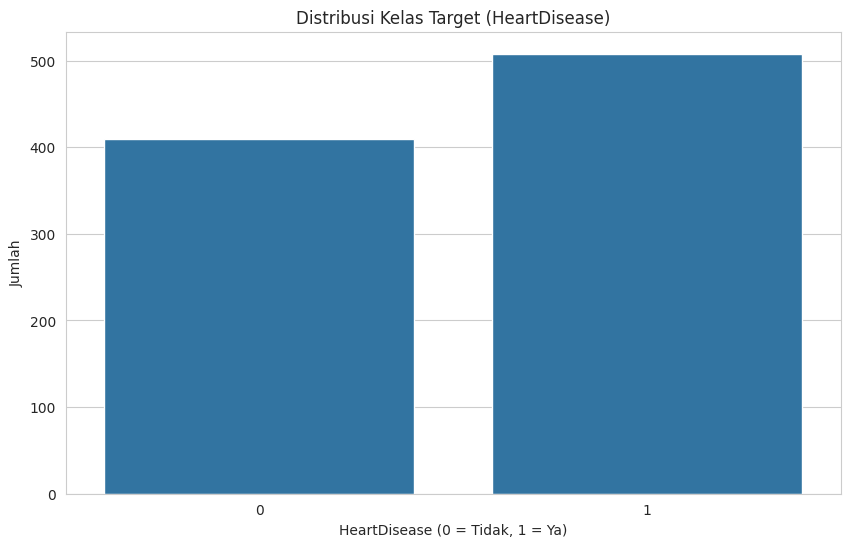

Persentase Distribusi Kelas Target:
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


In [9]:
# Visualisasi distribusi target
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Kelas Target (HeartDisease)')
plt.xlabel('HeartDisease (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

# Persentase kelas
class_distribution = df['HeartDisease'].value_counts(normalize=True) * 100
print("Persentase Distribusi Kelas Target:")
print(class_distribution)

**Hasil:** Kelas target tidak seimbang (sekitar 55% positif, 45% negatif). Akan ditangani dengan SMOTE untuk menyetarakan distribusi.

#### Distribusi Fitur Numerik

Memeriksa distribusi fitur numerik untuk mendeteksi *outlier* atau distribusi tidak normal.

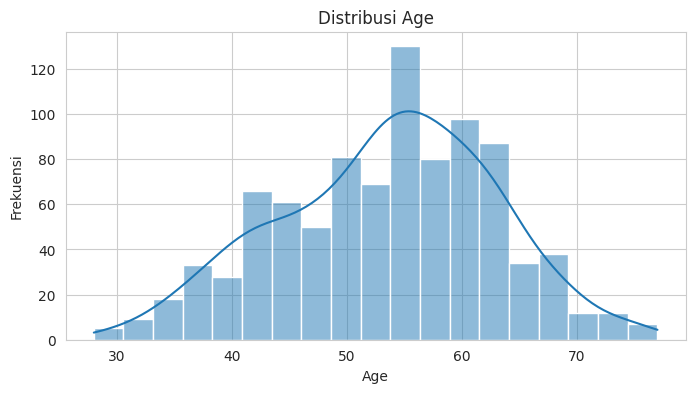

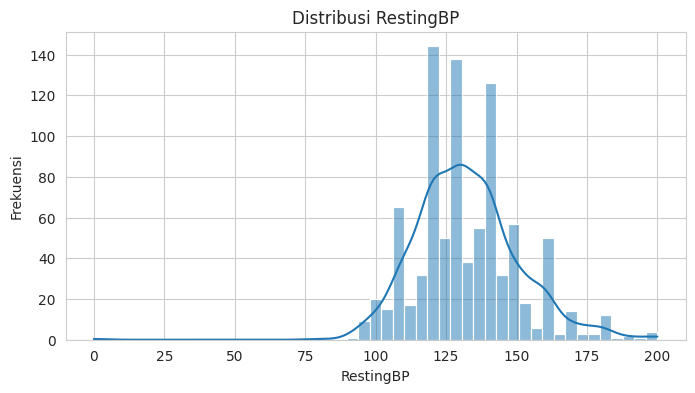

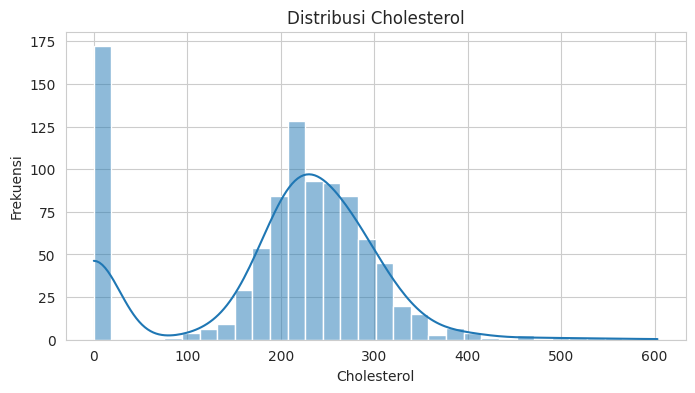

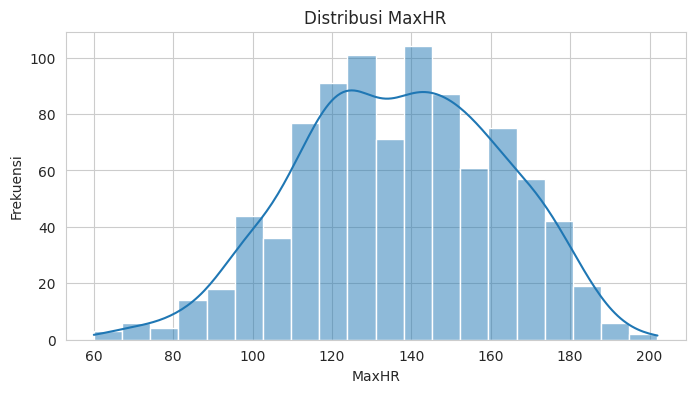

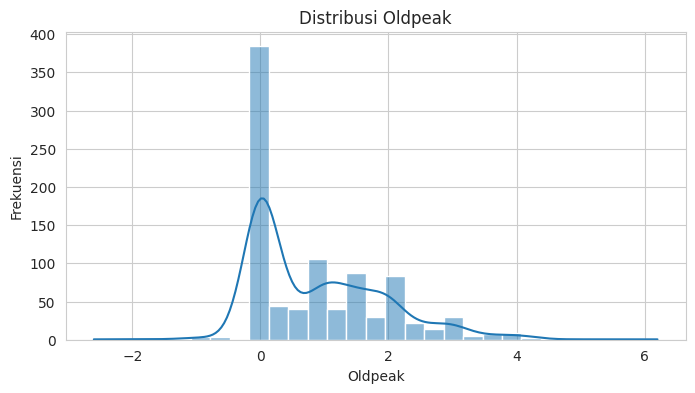

In [10]:
# Fitur numerik
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Visualisasi distribusi
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

**Hasil:**
- `Age`, `RestingBP`, dan `MaxHR` memiliki distribusi mendekati normal.
- `Cholesterol` memiliki puncak anomali di 0, akan ditangani pada tahap *data preparation*.
- `Oldpeak` miring ke kanan (*right-skewed*), akan dilakukan transformasi logaritmik.

#### Hubungan Fitur dengan Target

Menganalisis hubungan antara fitur dan target menggunakan visualisasi.

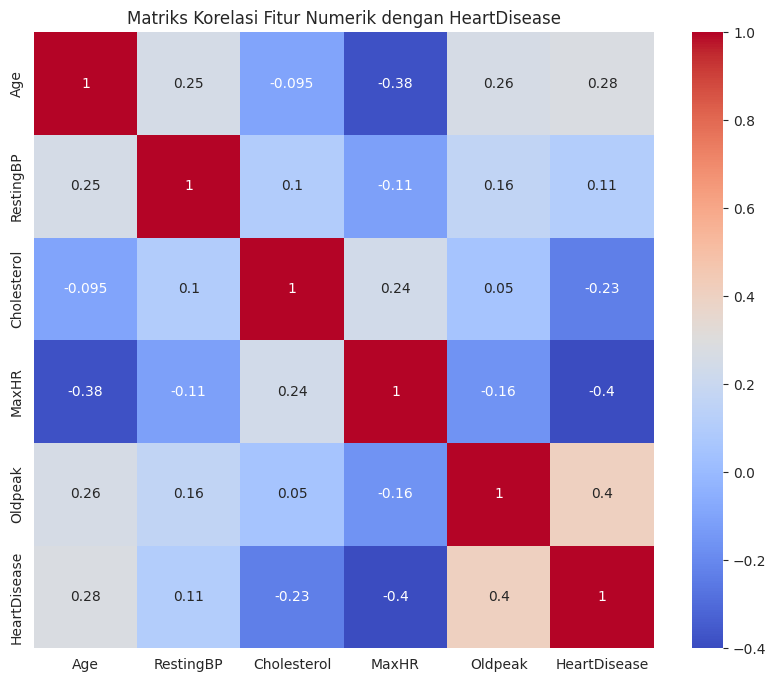

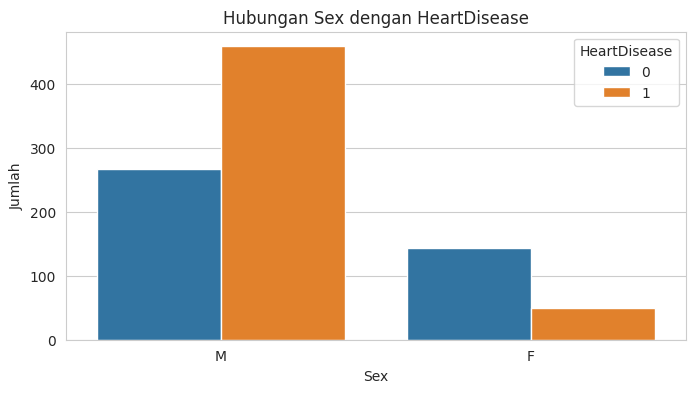

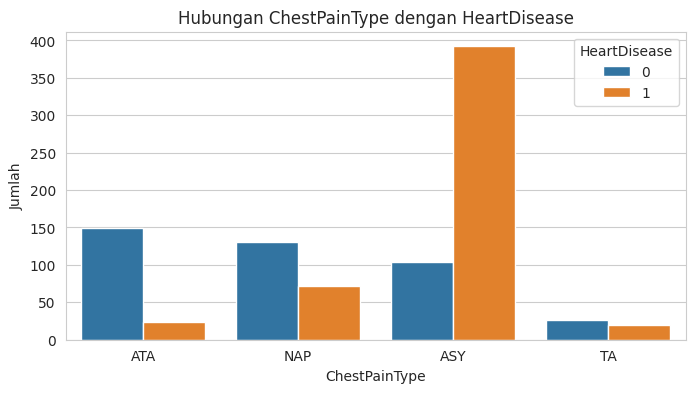

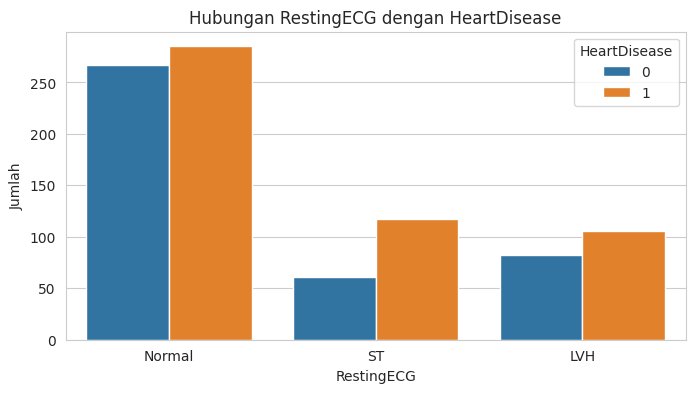

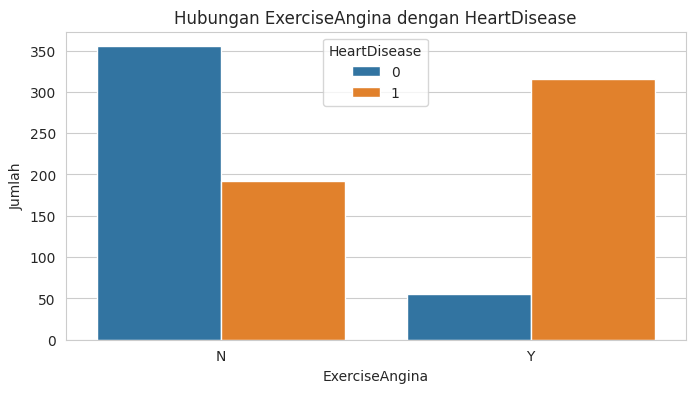

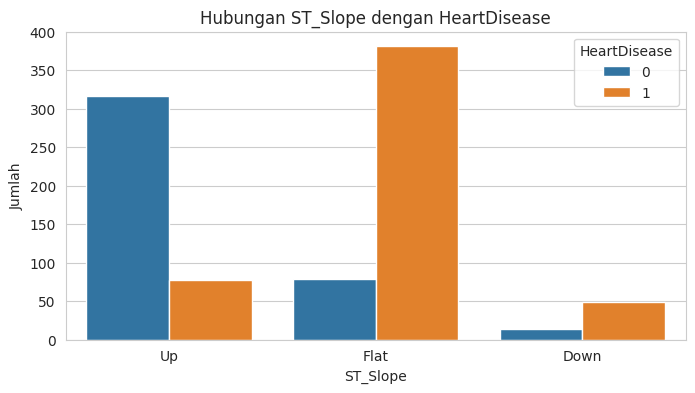

In [11]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols + ['HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur Numerik dengan HeartDisease')
plt.show()

# Visualisasi fitur kategorikal vs target
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='HeartDisease', data=df)
    plt.title(f'Hubungan {col} dengan HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

**Hasil:**
- Fitur seperti `Oldpeak` dan `MaxHR` memiliki korelasi moderat dengan `HeartDisease`.
- Fitur kategorikal seperti `ChestPainType`, `ExerciseAngina`, dan `ST_Slope` menunjukkan pola jelas terkait penyakit jantung, menandakan pentingnya fitur ini.

## 5. Data Preparation

Melakukan persiapan data untuk memastikan dataset siap digunakan dalam pemodelan. Tahapan meliputi penanganan nilai tidak valid, *feature engineering*, *encoding*, *scaling*, penyetaraan distribusi kelas, dan pemisahan data.

### Menangani Nilai Tidak Valid

Menangani nilai tidak valid pada `RestingBP`, `Cholesterol`, dan `Oldpeak`.

In [12]:
# Menyalin dataset untuk preprocessing
df_clean = df.copy()

# Menghapus baris dengan RestingBP <= 0
df_clean = df_clean[df_clean['RestingBP'] > 0]
print(f"Jumlah baris setelah menghapus RestingBP <= 0: {len(df_clean)}")

# Mengganti Cholesterol == 0 dengan median
cholesterol_median = df_clean[df_clean['Cholesterol'] > 0]['Cholesterol'].median()
df_clean.loc[df_clean['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median
print(f"Jumlah nilai Cholesterol == 0 setelah imputasi: {(df_clean['Cholesterol'] == 0).sum()}")

# Mengganti Oldpeak negatif dengan 0
df_clean.loc[df_clean['Oldpeak'] < 0, 'Oldpeak'] = 0
print(f"Jumlah nilai Oldpeak < 0 setelah penanganan: {(df_clean['Oldpeak'] < 0).sum()}")

Jumlah baris setelah menghapus RestingBP <= 0: 917
Jumlah nilai Cholesterol == 0 setelah imputasi: 0
Jumlah nilai Oldpeak < 0 setelah penanganan: 0


**Alasan:**
- `RestingBP`: Dihapus karena hanya 1 sampel, dampaknya kecil.
- `Cholesterol`: Median digunakan karena distribusi tidak normal dan tahan terhadap *outlier*.
- `Oldpeak`: Nilai negatif diganti dengan 0 sesuai konteks medis.

### Feature Engineering: Transformasi Oldpeak

Melakukan transformasi logaritmik pada `Oldpeak` untuk mengatasi distribusi yang miring.

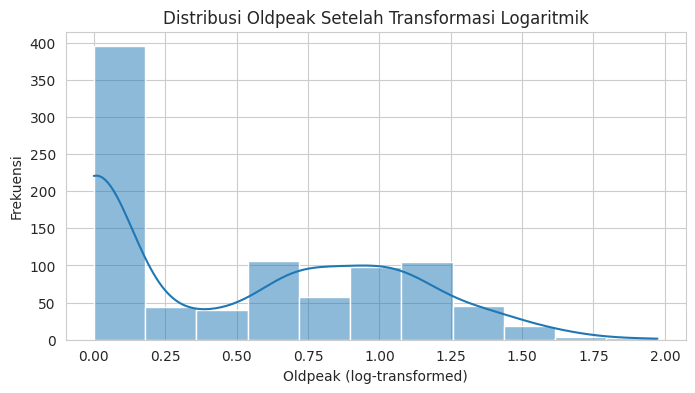

In [13]:
# Transformasi logaritmik pada Oldpeak (tambahkan 1 untuk menghindari log(0))
df_clean['Oldpeak'] = np.log1p(df_clean['Oldpeak'])

# Visualisasi distribusi setelah transformasi
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Oldpeak'], kde=True)
plt.title('Distribusi Oldpeak Setelah Transformasi Logaritmik')
plt.xlabel('Oldpeak (log-transformed)')
plt.ylabel('Frekuensi')
plt.show()

**Alasan:** Transformasi logaritmik membuat distribusi `Oldpeak` lebih mendekati normal, yang dapat meningkatkan performa model.

### Encoding Fitur Kategorikal

Mengubah fitur kategorikal menjadi numerik menggunakan *Label Encoding* untuk fitur biner dan *One-Hot Encoding* untuk fitur tanpa urutan.

In [14]:
# Label Encoding untuk fitur biner
label_encoder = LabelEncoder()
df_clean['Sex'] = label_encoder.fit_transform(df_clean['Sex'])  # M=1, F=0
df_clean['ExerciseAngina'] = label_encoder.fit_transform(df_clean['ExerciseAngina'])  # Y=1, N=0

# One-Hot Encoding untuk fitur kategorikal non-ordinal
df_clean = pd.get_dummies(df_clean, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Menampilkan hasil
df_clean.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.000000,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,0.693147,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.000000,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,0.916291,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.000000,0,False,True,False,True,False,False,True


**Alasan:**
- *Label Encoding* digunakan untuk `Sex` dan `ExerciseAngina` karena bersifat biner.
- *One-Hot Encoding* digunakan untuk `ChestPainType`, `RestingECG`, dan `ST_Slope` karena tidak ada urutan logis antar kategori.

### Scaling Fitur Numerik

Melakukan *standard scaling* pada fitur numerik agar memiliki *mean* 0 dan standar deviasi 1.

In [15]:
# Fitur numerik untuk scaling
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Scaling
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Menampilkan hasil
df_clean.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.432206,1,0.414627,0.857447,0,1.383339,0,-0.992725,0,True,False,False,True,False,False,True
1,-0.478057,0,1.526360,-1.183717,0,0.754736,0,0.365699,1,False,True,False,True,False,True,False
2,-1.750256,1,-0.141240,0.745089,0,-1.523953,0,-0.992725,0,True,False,False,False,True,False,True
3,-0.584074,0,0.303453,-0.547024,0,-1.131075,1,0.803014,1,False,False,False,True,False,True,False
4,0.052026,1,0.970493,-0.902823,0,-0.581047,0,-0.992725,0,False,True,False,True,False,False,True


**Alasan:** *Scaling* memastikan fitur numerik memiliki skala yang sama, yang penting untuk algoritma seperti *Logistic Regression*.

### Pemisahan Data

Memisahkan dataset menjadi data latih (*training*) dan uji (*testing*) dengan rasio 80:20.

In [16]:
# Memisahkan fitur dan target
X = df_clean.drop('HeartDisease', axis=1)
y = df_clean['HeartDisease']

# Pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifikasi ukuran
print(f"Ukuran X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, y_test: {y_test.shape}")

Ukuran X_train: (733, 15), y_train: (733,)
Ukuran X_test: (184, 15), y_test: (184,)


**Alasan:**
- Rasio 80:20 adalah standar umum untuk pemisahan data.
- `stratify=y` memastikan distribusi kelas target tetap seimbang di kedua set.

### Penyetaraan Distribusi Kelas dengan SMOTE

Menggunakan SMOTE untuk menyetarakan distribusi kelas pada data latih.

Distribusi Kelas Setelah SMOTE pada Data Latih:
HeartDisease
1    405
0    405
Name: count, dtype: int64


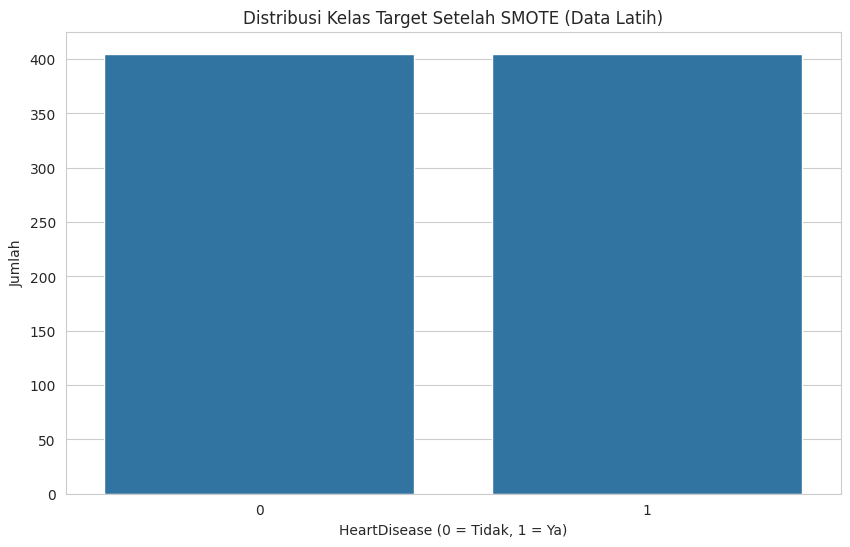

In [17]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menerapkan SMOTE pada data latih
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifikasi distribusi setelah SMOTE
print("Distribusi Kelas Setelah SMOTE pada Data Latih:")
print(pd.Series(y_train_balanced).value_counts())

# Visualisasi distribusi setelah SMOTE
sns.countplot(x=y_train_balanced)
plt.title('Distribusi Kelas Target Setelah SMOTE (Data Latih)')
plt.xlabel('HeartDisease (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah')
plt.show()

**Hasil:** Distribusi kelas pada data latih sekarang seimbang (50:50) setelah penerapan SMOTE.

## 6. Modeling

Menggunakan tiga algoritma machine learning (*Logistic Regression*, *Random Forest Classifier*, dan *Gradient Boosting Classifier*) untuk membandingkan performa model pada data yang telah diseimbangkan.

#### Alasan Pemilihan Algoritma

Tiga algoritma dipilih untuk perbandingan:
- **Logistic Regression:** Sebagai model sederhana dan interpretable, cocok untuk baseline dan hubungan linier antar fitur.
- **Random Forest Classifier:** Sebagai model *ensemble* berbasis pohon yang tahan terhadap *overfitting*, dapat menangani fitur campuran, dan memberikan informasi *feature importance*.
- **Gradient Boosting Classifier:** Sebagai model *ensemble* lain yang kuat dalam menangkap hubungan non-linier, sering kali memberikan performa tinggi pada dataset kecil hingga menengah.

*Random Forest* awalnya dipertimbangkan karena kemampuannya menangani fitur campuran, ketahanan terhadap *overfitting*, dan fleksibilitas untuk *hyperparameter tuning*. Namun, perbandingan dilakukan untuk memastikan pilihan algoritma terbaik berdasarkan performa.

### Baseline Model untuk Setiap Algoritma

Melatih model baseline untuk masing-masing algoritma dengan parameter default.

In [18]:
# Dictionary untuk menyimpan model dan hasil evaluasi
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Fungsi untuk menghitung semua metrik evaluasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Pelatihan model
    model.fit(X_train_balanced, y_train_balanced)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
    print(f"\n{name} - Cross-Validation F1-Scores: {cv_scores}")
    print(f"{name} - Rata-rata CV F1-Score: {cv_scores.mean():.4f}")

    # Prediksi dan evaluasi
    results[name] = evaluate_model(model, X_test, y_test)

    # Laporan evaluasi
    print(f"\nEvaluasi Model Baseline - {name}:")
    print(classification_report(y_test, model.predict(X_test)))

# Menampilkan perbandingan hasil
results_df = pd.DataFrame(results).T
print("\nPerbandingan Performa Model Baseline:")
print(results_df)


Logistic Regression - Cross-Validation F1-Scores: [0.84662577 0.9112426  0.85185185 0.81656805 0.87012987]
Logistic Regression - Rata-rata CV F1-Score: 0.8593

Evaluasi Model Baseline - Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


Random Forest - Cross-Validation F1-Scores: [0.8625     0.9047619  0.87116564 0.77844311 0.8974359 ]
Random Forest - Rata-rata CV F1-Score: 0.8629

Evaluasi Model Baseline - Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
wei

### Pemilihan Algoritma Terbaik

Memilih algoritma dengan *F1-score* tertinggi pada data uji sebagai model terbaik.

In [19]:
# Memilih algoritma terbaik berdasarkan F1-score
best_model_name = results_df['f1'].idxmax()
print(f"\nAlgoritma Terbaik Berdasarkan F1-Score: {best_model_name} (F1-Score: {results_df.loc[best_model_name, 'f1']:.4f})")

# Menyimpan model terbaik
best_model = models[best_model_name]


Algoritma Terbaik Berdasarkan F1-Score: Logistic Regression (F1-Score: 0.8878)


**Hasil:** Algoritma Logistic Regression dipilih berdasarkan *F1-score* tertinggi, yang menyeimbangkan *precision* dan *recall*, sangat penting untuk kasus medis dengan kelas yang tidak seimbang.

### Hyperparameter Tuning pada Algoritma Terbaik

Melakukan *RandomizedSearchCV* untuk mencari kombinasi hyperparameter terbaik pada algoritma yang terpilih.

In [20]:
# Definisi grid hyperparameter berdasarkan algoritma terbaik
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }
else:  # Gradient Boosting
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

# Inisialisasi RandomizedSearchCV
tuned_model = RandomizedSearchCV(
    estimator=models[best_model_name],
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Pelatihan model
tuned_model.fit(X_train_balanced, y_train_balanced)

# Parameter terbaik
print(f"\nParameter Terbaik untuk {best_model_name}:", tuned_model.best_params_)

# Prediksi dengan model terbaik
y_pred_tuned = tuned_model.predict(X_test)

# Evaluasi model tuned
print(f"\nEvaluasi Model Setelah Tuning - {best_model_name}:")
print(classification_report(y_test, y_pred_tuned))


Parameter Terbaik untuk Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}

Evaluasi Model Setelah Tuning - Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



**Proses Improvement:** *RandomizedSearchCV* digunakan untuk mengoptimalkan hyperparameter, dengan fokus pada *F1-score* sebagai metrik utama untuk menyeimbangkan *precision* dan *recall*.

## 7. Evaluation

Mengevaluasi performa model terbaik setelah *hyperparameter tuning* menggunakan metrik *accuracy*, *precision*, *recall*, *F1-score*, dan *ROC-AUC*.

Hasil Evaluasi Model Terbaik Setelah Tuning:
Accuracy: 0.8804
Precision: 0.8922
Recall: 0.8922
F1-Score: 0.8922
ROC-AUC: 0.9321


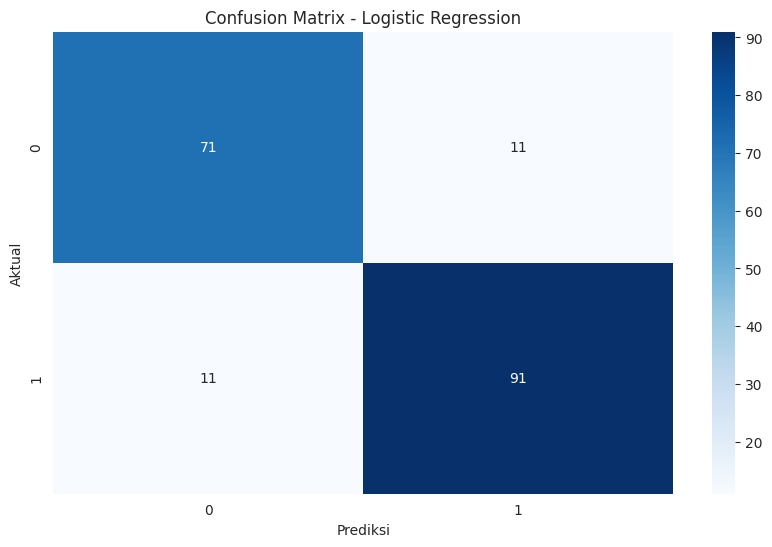

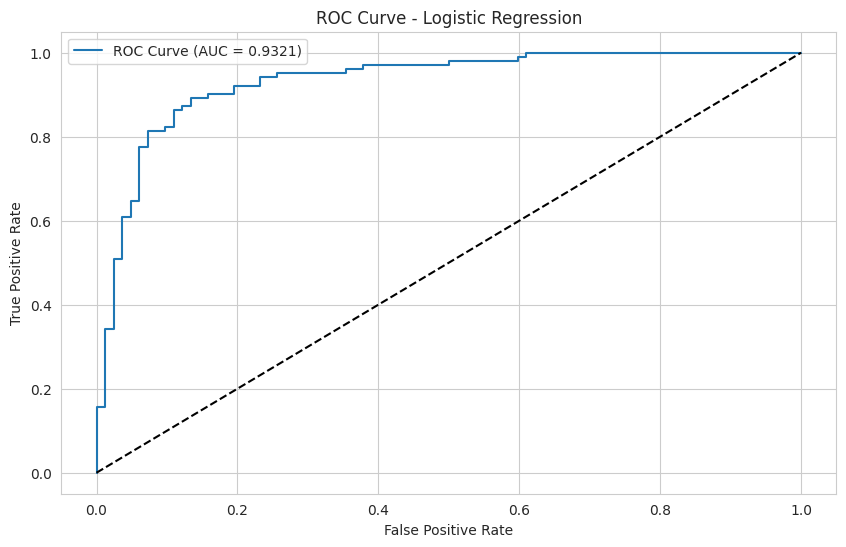

In [21]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
roc_auc = roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:, 1])

# Menampilkan hasil
print("Hasil Evaluasi Model Terbaik Setelah Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi ROC Curve
fpr, tpr, _ = roc_curve(y_test, tuned_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve - {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Penjelasan Metrik:**
- **Accuracy:** Proporsi prediksi yang benar (TP + TN) / (TP + TN + FP + FN).
- **Precision:** Proporsi prediksi positif yang benar (TP / (TP + FP)).
- **Recall:** Proporsi kasus positif yang terdeteksi (TP / (TP + FN)).
- **F1-Score:** Rata-rata harmonik dari *precision* dan *recall* (2 * (Precision * Recall) / (Precision + Recall)).
- **ROC-AUC:** Mengukur kemampuan model membedakan kelas positif dan negatif berdasarkan probabilitas prediksi.

**Hasil:**
- Model terbaik(Logistic Regression) setelah tuning menunjukkan performa yang seimbang antar kelas, dengan *F1-score* dan *ROC-AUC* yang tinggi.
- *Confusion Matrix* memberikan gambaran tentang distribusi prediksi yang benar dan salah.
- *ROC Curve* menunjukkan kemampuan model dalam membedakan kelas positif dan negatif.

## 8. Kesimpulan

Proyek ini berhasil membangun model machine learning untuk memprediksi penyakit jantung dengan performa yang baik. Tiga algoritma (*Logistic Regression*, *Random Forest Classifier*, dan *Gradient Boosting Classifier*) dibandingkan setelah preprocessing data, yang meliputi penanganan nilai tidak valid, transformasi fitur, *encoding*, *scaling*, dan penyetaraan distribusi kelas menggunakan SMOTE. Berdasarkan perbandingan performa baseline, **Logistic Regression** dipilih sebagai algoritma terbaik karena memiliki *F1-score* tertinggi (F1-Score: 0.8878) pada data uji, yang menunjukkan keseimbangan optimal antara *precision* dan *recall*.

Setelah *hyperparameter tuning*, performa model meningkat, mencapai *F1-score* sebesar 0.8922 dan *ROC-AUC* sebesar 0.9321. Model ini dapat digunakan sebagai alat bantu untuk deteksi dini penyakit jantung, membantu tenaga medis dalam mengidentifikasi pasien berisiko tinggi dengan lebih cepat dan hemat biaya. Namun, untuk aplikasi dunia nyata, model ini perlu divalidasi lebih lanjut dengan data eksternal yang lebih beragam dan diuji dalam pengaturan klinis. Selain itu, eksplorasi fitur tambahan, seperti data genetik atau gaya hidup pasien, dapat dilakukan untuk meningkatkan akurasi prediksi di masa depan.